In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("datasetforPCA.csv")

In [3]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [11]:
x=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values

In [12]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x=s.fit_transform(x)

In [15]:
from sklearn.decomposition import PCA
p=PCA(n_components=2)
x=p.fit_transform(x)

In [16]:
print(p.explained_variance_ratio_)

[0.36198848 0.1920749 ]


In [17]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
from sklearn.svm import SVC
c=SVC(kernel="rbf",random_state=0)
c.fit(x_tr,y_tr)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [19]:
y_pred=c.predict(x_te)

In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_te,y_pred))

0.9722222222222222


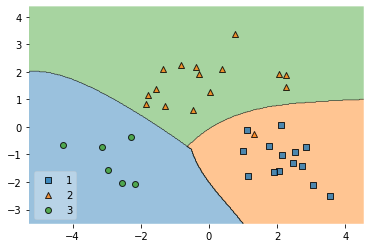

In [24]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=x_te,y=y_te,clf=c,legend=3)
plt.show()